In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [78]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df=df[['Age','Fare','Survived']]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [80]:
df.dtypes

Age         float64
Fare        float64
Survived      int64
dtype: object

In [81]:
# let's look at the percentage of NA
df.isnull().mean()

Age         0.200917
Fare        0.000764
Survived    0.000000
dtype: float64

The only variable with missing data is Age, and Fare missing observations.

### Imputation important

Imputation should be done over the training set, and then propagated to the test set. This means that the mean / median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [82]:
# let's separate into training and testing set
X_train,X_test,y_train,y_test=train_test_split(
    df[['Age','Fare']], #indipedent variable
    df['Survived'], #target
    test_size=0.30, random_state=0)
X_train.shape, X_test.shape

((916, 2), (393, 2))

In [83]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset
X_train.isnull().mean()

Age     0.201965
Fare    0.001092
dtype: float64

In [84]:
X_test.isnull().mean()

Age     0.198473
Fare    0.000000
dtype: float64

In [85]:
# Create a function to calcuate mean and median
#mean_c=X_train.Age.mean()
#mean_c

In [92]:
#Create a class for calcultion mean and media
class MM():
    def __init__(self):
        pass
    def mean(self,df,var):
        return df[var].mean()
    
    def median(self,df,var):
        return df[var].median()

In [87]:
mean_c=MM()

In [93]:
age_mean = mean_c.mean(X_train,'Age')
age_mean

29.82559507523939

In [94]:
age_median = mean_c.median(X_train,'Age')
age_median

28.0

In [95]:
fare_mean = mean_c.mean(X_train,'Fare')
fare_mean

31.92214021857919

In [96]:
fare_median = mean_c.median(X_train,'Fare')
fare_median

13.8625

In [101]:
# create a new variable with the missing values replaced
# using the function we created above
# first replace with the mean and median
X_train['Age_mean']=X_train['Age'].fillna(age_mean)
X_train['Age_median']=X_train['Age'].fillna(age_median)
X_train['Fare_mean']=X_train['Fare'].fillna(fare_mean)
X_train['Fare_median']=X_train['Fare'].fillna(fare_median)

In [108]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
print('Age Original variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())
print('Age Original SD: ', X_train['Age'].std())
print('Age after median SD: ', X_train['Age_median'].std())
print('Age after mean SD: ', X_train['Age_mean'].std())

Age Original variable variance:  209.35044851526322
Age Variance after median imputation:  167.56051347829762
Age Variance after mean imputation:  167.02276220343418
Age Original SD:  14.46894773351757
Age after median SD:  12.944516734057615
Age after mean SD:  12.923728649404326


In [109]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
print('Fare Original variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('FareVariance after mean imputation: ', X_train['Fare_mean'].var())
print('Fare Original SD: ', X_train['Fare'].std())
print('Fare after median SD: ', X_train['Fare_median'].std())
print('Fare  after mean SD: ', X_train['Fare_mean'].std())

Fare Original variable variance:  2653.4930625305483
Fare Variance after median imputation:  2650.949129724737
FareVariance after mean imputation:  2650.593070112483
Fare Original SD:  51.51206715450806
Fare after median SD:  51.48736864246159
Fare  after mean SD:  51.48391078883269


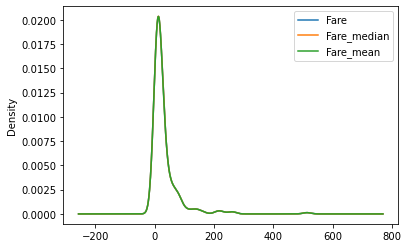

In [121]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde',ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde',ax=ax)

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde',ax=ax)

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [123]:
#We can see in fare no changes with actual variable after fill na

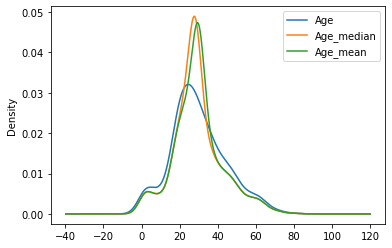

In [124]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde',ax=ax)

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde',ax=ax)

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [125]:
#We could see in Age its changes in Actual vs mean is huge. Actaul vs median slight canges.

In [126]:
# we also said that mean / median imputation may affect the relationship 
# with the other variables in the dataset, let's have a look
X_train[['Fare','Age','Fare_mean','Fare_median','Age_mean','Age_median']].cov()

,Fare,Age,Fare_mean,Fare_median,Age_mean,Age_median
Fare,2653.493063,144.797281,2653.493063,2653.493063,115.377297,120.243262
Age,144.797281,209.350449,144.458698,143.699837,209.350449,209.350449
Fare_mean,2653.493063,144.458698,2650.593070,2650.593070,115.251202,120.111849
Fare_median,2653.493063,143.699837,2650.593070,2650.949130,114.645772,119.499141
Age_mean,115.377297,209.350449,115.251202,114.645772,167.022762,167.022762
Age_median,120.243262,209.350449,120.111849,119.499141,167.022762,167.560513


We see indeed that the covariance between Age and Fare is changed after the mean / median imputation.

<AxesSubplot:>

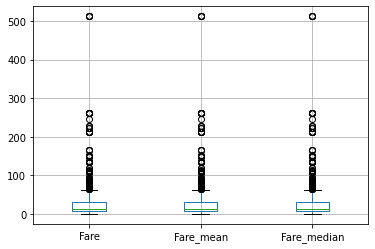

In [128]:
# Finally, I mentioned that mean / median imputation may lead 
# to observations that are normal, to look like outliers

# or in other words, mean / median imputation may lead to an increase
# in the apparent number of  outliers

# Let's find out using a boxplot
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

In [129]:
#We could see Fare box plot almost same origianl with mean and median

<AxesSubplot:>

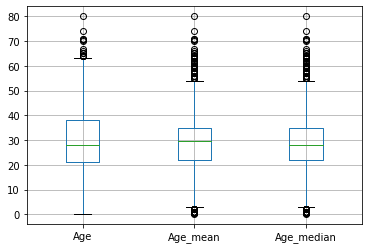

In [130]:
X_train[['Age','Age_mean','Age_median']].boxplot()

In [131]:
#We could see lot of canges Original age with Age_mean and Age_median

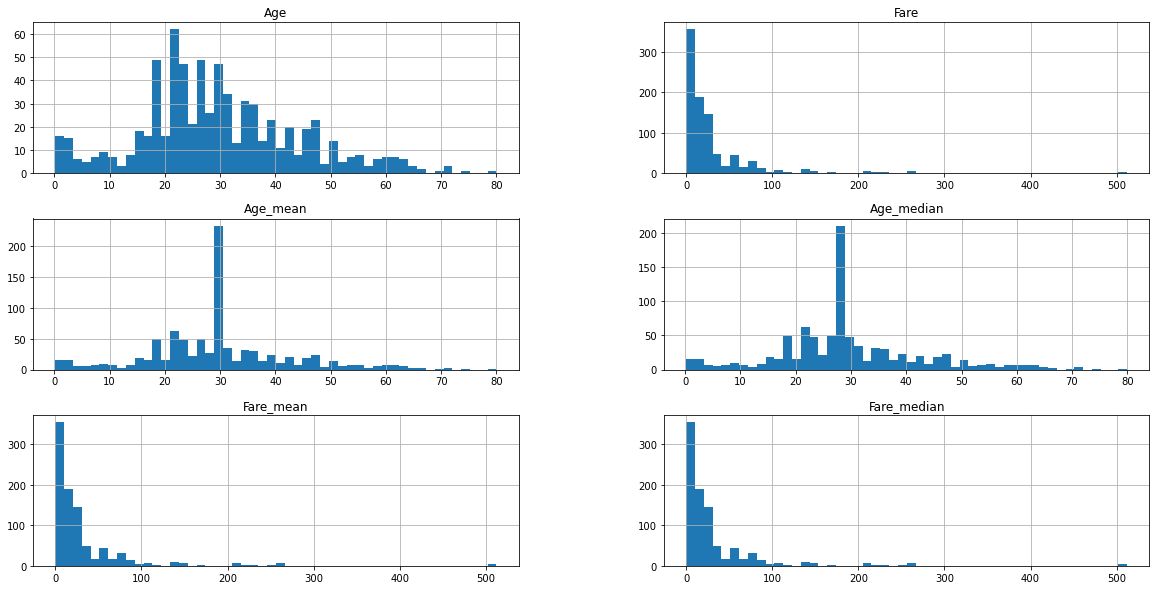

In [134]:
X_train.hist(bins=50, figsize=(20,10))
plt.show()

In [135]:
#This is giving full clear picture on distrition (Age) and non distrition on (Fare)